## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in training the models.

We demonstrate this for our two data dimensionalities:
1) 0D, linear data
2) 2D, image data

For both data dimensionalities, we use the medium noise injection ($\sigma_y$ = 0.05) and and the output noise injection mode, although both of these settings can be easily changed to simulate and save different types of data.

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import DataPreparation, MyDataLoader
from torch.utils.data import TensorDataset

In [27]:
%matplotlib inline

## 1) Save 0D, linear data

Use the `DataPreparation()` class from `data` to simulate data.

In [2]:
data = DataPreparation()

The below function packages together aall of the options for different tweaks to make to the data as it is prepared.

In [3]:
injection = 'output'
dim = '0D'
noise = 'low'
size_df = 1000
uniform = True
verbose = True

generating dataframe
inflating starting size because sub-selecting                       uniform
injecting this noise low
inject type is output, dim is 0D, noise is low
number of sims 5000
NO WERE NOT VARYING SIGMA
0D data generated,                 with noise injected type: output.
bins for uniformity in y [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
starting n_bin_values [45918, 46136, 46024, 46098, 46036, 43241, 37701, 32636, 28467, 24521]


/Users/rnevin/Documents/DeepUQ/src/data/data.py:195: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  df[key] = torch.tensor(value)


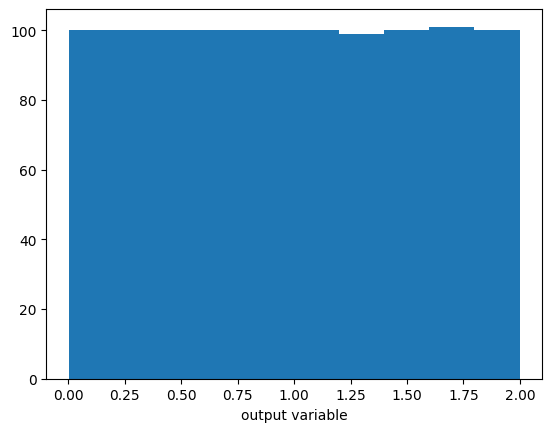

shape before cut (500000,)
shape once uniform (1000,)
size after uniform (1000, 3)


(array([[1.41414142, 0.11550452, 0.        ],
        [0.80808079, 0.18065847, 0.        ],
        [0.4040404 , 0.24545763, 0.        ],
        ...,
        [4.94949484, 0.3964108 , 0.        ],
        [8.88888931, 0.21800585, 0.        ],
        [8.88888931, 0.21428556, 0.        ]]),
 array([1.56357616e-01, 1.73144326e-01, 1.04462571e-01, 1.98880285e-01,
        1.22898053e-02, 8.29909462e-03, 1.08851492e-01, 1.19005322e-01,
        3.55325229e-02, 1.78759396e-01, 6.91617578e-02, 1.47357792e-01,
        9.18040946e-02, 5.06763831e-02, 1.60639107e-01, 8.05297121e-02,
        1.28629610e-01, 9.35744867e-02, 8.04076046e-02, 1.64741933e-01,
        1.94591820e-01, 1.95575655e-02, 7.05938861e-02, 1.92424059e-01,
        3.72633822e-02, 1.05128691e-01, 7.46320710e-02, 9.78511870e-02,
        8.38700756e-02, 6.17373548e-02, 9.45830792e-02, 1.68533087e-01,
        1.36210352e-01, 5.69784455e-02, 6.77327663e-02, 1.38544336e-01,
        1.48642719e-01, 1.33983120e-01, 1.12677418e-01, 6.105

In [4]:
data.generate_df(size_df, noise, dim, injection, uniform, verbose)

The dictionary element is what we're interested in.

In [6]:
dict = data.get_dict()

Visualize what the dataset looks like.

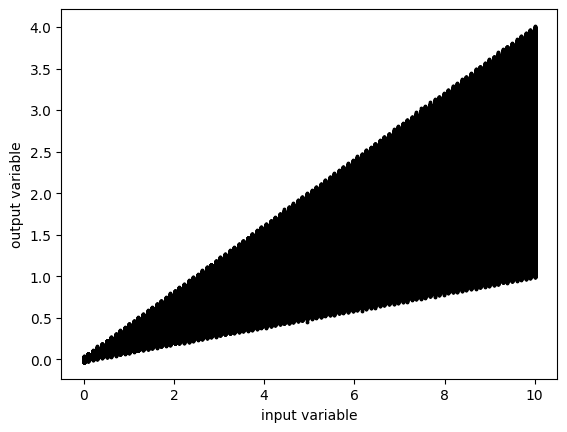

In [7]:
plt.scatter(dict['input'], dict['output'], color='black', s=3)
plt.xlabel('input variable')
plt.ylabel('output variable');

Load the class you'll need to save the data.

In [8]:
saver = MyDataLoader()
saver.save_data_h5(f'{dim}_{injection}_noise_{noise}_size_{size_df}', dict)

## 2) Save 2D, imaging data
Re-initialize the DataPreparation() class and use the same `prepare_data` function as before.

In [9]:
data = DataPreparation()

generating dataframe
inflating starting size because sub-selecting                       uniform
2D data generated,                 with noise injected type: output.
bins for uniformity in y [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
starting n_bin_values [5478, 3479, 2378, 1863, 1539, 1294, 1134, 976, 846, 724]


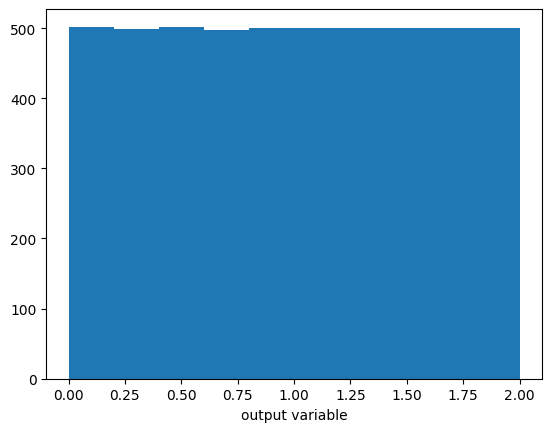

shape before cut (25000,)
shape once uniform (5000,)
size after uniform (5000, 32, 32)


(array([[[1.56603516e-18, 2.02797859e-18, 2.65178014e-18, ...,
          2.28933068e-24, 7.72925554e-25, 2.85992837e-25],
         [1.13771233e-17, 1.55915803e-17, 2.17144131e-17, ...,
          2.47451664e-23, 8.17176885e-24, 2.95746527e-24],
         [8.34077846e-17, 1.21432777e-16, 1.80780607e-16, ...,
          2.80462124e-22, 9.05262159e-23, 3.20231871e-23],
         ...,
         [1.01636542e-22, 3.00714760e-22, 9.76751738e-22, ...,
          2.10035786e-15, 1.40096413e-15, 9.53064293e-16],
         [9.88012666e-24, 2.85262648e-23, 9.04042549e-23, ...,
          2.52948626e-16, 1.81277670e-16, 1.31649188e-16],
         [1.00254927e-24, 2.82634909e-24, 8.74529261e-24, ...,
          3.08239438e-17, 2.36312251e-17, 1.82367657e-17]],
 
        [[1.24837032e-11, 2.54460228e-11, 5.30135112e-11, ...,
          5.16885062e-19, 1.21797424e-19, 3.15878510e-20],
         [1.88936588e-11, 4.14470359e-11, 9.35508267e-11, ...,
          1.75949591e-18, 4.09291632e-19, 1.04803856e-19],
       

In [10]:
injection = 'output'
dim = '2D'
noise = 'medium'
size_df = 5000
uniform = True
verbose = True
data.generate_df(size_df, noise, dim, injection, uniform, verbose)

In [11]:
dict = data.get_dict()

Visualize one example from the dataset.

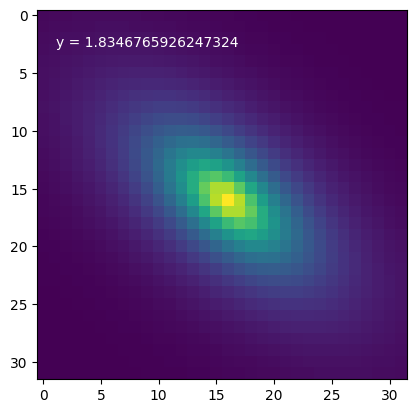

In [26]:
plt.imshow(dict['input'][0,:,:])
plt.annotate('y = '+str(dict['output'][0]),
            xy=(0.05, 0.9),
            xycoords='axes fraction',
            color='white');

In [12]:
saver = MyDataLoader()
saver.save_data_h5(f'{dim}_{injection}_noise_{noise}_size_{size_df}', dict)

### 3) Now train a model from the saved data
For more details of the options for training, see `DeepEnsemble_train_and_validate.ipynb`.

In [14]:
noise = "medium"
dim = "2D"
injection = "output"
n_models = 5
n_epochs = 100
out_dir = "../DeepUQResources/"
size_df = 5000
data_path = "../data/"

In [ ]:
!python ../src/scripts/DeepEnsemble.py --noise_level $noise \
    --n_models $n_models --data_dimension $dim \
    --data_injection $injection --uniform --overwrite_final_checkpoint \
    --save_all_checkpoints --save_final_checkpoint --out_dir $out_dir \
    --n_epochs $n_epochs --size_df $size_df --data_path $data_path --verbose

Reading settings from cli and default,               dumping to temp config:  ./DeepUQResources/temp/temp_config_DE_20241014123147.yml
loading data from file
shape of input (25000, 32, 32) shape of output (25000,) type of input <class 'numpy.ndarray'>
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
save final checkpoint has this value True
model name is  DE
dim is  2D
norm params None
starting here 0
model 0
model is Sequential(
  (0): ConvLayers(
    (conv1): Conv2d(1, 5, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(5, 5, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (pool1): AvgPool2d(kernel_size=2, stride=2, padding=1)
    (conv3): Conv2d(5, 5, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (pool2): AvgPool2d(kernel_size=2, stride=2, padding=1)
    (conv4): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1